## Fashion MNIST Fashion dataset -  SVC and SGD Classifiers

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import tensorflow as tf
random_state=42
np.random.seed(123)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data
(X0_train, y1_train), (X0_test, y1_test)=tf.keras.datasets.fashion_mnist.load_data()

### 1. Exploring data

In [3]:
type(X0_train)

numpy.ndarray

In [4]:
X0_test.shape

(10000, 28, 28)

In [5]:
# reshaping data into 2D array
X1_train=X0_train.reshape(60000,784)
X1_test=X0_test.reshape(10000,784)


In [6]:
#Scaling data
X_train=X1_train[:10000]/255
X_test=X1_test[:10000]/255
y_train=y1_train[:10000]
y_test=y1_test[:10000]


In [7]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_train.shape

(10000, 784)

In [9]:
y_train.shape

(10000,)

In [10]:
X_test.shape

(10000, 784)

In [11]:
X_train.max()

1.0

In [12]:
y_train.max()

9

### 2. Support Vector Machine

**2.1. Training SVC Model**

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict
import time

time_start = time.time()

svm_clf = SVC()
cv_scores=cross_val_score(svm_clf,X_train, y_train, cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SVC mean accuracy:',round(cv_scores.mean()*100,3),'% std',round(cv_scores.var()*100,3),'%')

C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Machine-Learning\Instal

Time elapsed: 175.29650568962097 seconds
SVC mean accuracy: 81.02 % std 0.008 %


In [14]:
svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
print(cv_scores)

[0.81786427 0.81068931 0.82041021 0.79489745 0.80711423]


In [16]:
time_start = time.time()

svm_clf.fit(X_train, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Time elapsed: 32.906132221221924 seconds


In [17]:
svm_clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**2.2. Predicting Test Dataset**

In [18]:
time_start = time.time()

y_hat_svc = svm_clf.predict(X_test)

print('Test accuracy for SVC:'\
      , round(accuracy_score(y_test, y_hat_svc)*100, 2), '%')

print('Time elapsed: {} seconds'.format(time.time()-time_start))


Test accuracy for SVC: 80.9 %
Time elapsed: 51.49246692657471 seconds


**Confusion Matrix**

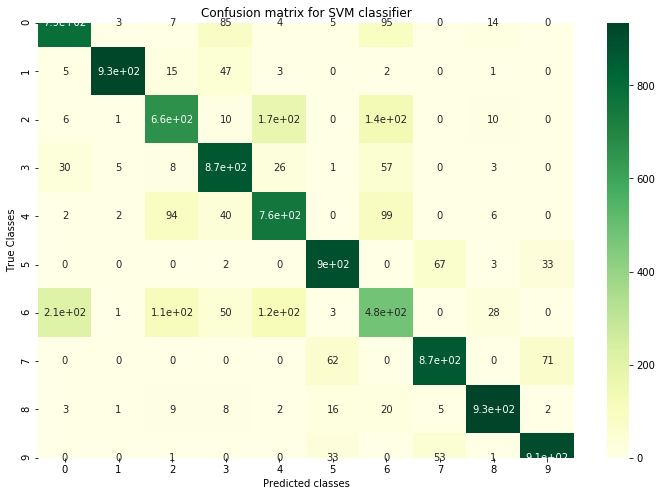

In [19]:
plt.figure(figsize=(12,8))
plt.title('Confusion matrix for SVM classifier')
sns.heatmap(confusion_matrix(y_test, y_hat_svc), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

**2.3. Trying Different Parameters**

In [20]:
svm_clf = SVC(kernel='poly',C=0.1,degree=4,gamma=0.1,coef0=2)
cv_scores=cross_val_score(svm_clf,X_train, y_train, cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SVC mean accuracy:',round(cv_scores.mean()*100,3),'% std',round(cv_scores.var()*100,3),'%')

Time elapsed: 128.81018996238708 seconds
SVC mean accuracy: 83.621 % std 0.01 %


In [21]:
svm_clf = SVC(kernel='poly',C=10,degree=4,gamma=0.1,coef0=2)
cv_scores=cross_val_score(svm_clf,X_train, y_train, cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SVC mean accuracy:',round(cv_scores.mean()*100,3),'% std',round(cv_scores.var()*100,3),'%')

Time elapsed: 206.06787967681885 seconds
SVC mean accuracy: 83.621 % std 0.01 %


In [22]:
svm_clf = SVC(kernel='rbf',C=0.1,gamma=0.1)
cv_scores=cross_val_score(svm_clf,X_train, y_train, cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SVC mean accuracy:',round(cv_scores.mean()*100,3),'% std',round(cv_scores.var()*100,3),'%')

Time elapsed: 764.5621745586395 seconds
SVC mean accuracy: 53.22 % std 0.019 %


In [23]:
svm_clf = SVC(kernel='rbf',C=10,gamma=0.1)
cv_scores=cross_val_score(svm_clf,X_train, y_train, cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SVC mean accuracy:',round(cv_scores.mean()*100,3),'% std',round(cv_scores.var()*100,3),'%')

Time elapsed: 1319.086152791977 seconds
SVC mean accuracy: 80.561 % std 0.015 %


In [24]:
svm_clf = SVC(kernel='sigmoid',C=10,gamma=0.1,coef0=2)
cv_scores=cross_val_score(svm_clf,X_train, y_train, cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SVC mean accuracy:',round(cv_scores.mean()*100,3),'% std',round(cv_scores.var()*100,3),'%')

Time elapsed: 1951.5572741031647 seconds
SVC mean accuracy: 15.62 % std 0.001 %


In [25]:
svm_clf = SVC(kernel='linear',C=10)
cv_scores=cross_val_score(svm_clf,X_train, y_train, cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SVC mean accuracy:',round(cv_scores.mean()*100,3),'% std',round(cv_scores.var()*100,3),'%')

Time elapsed: 2057.6244633197784 seconds
SVC mean accuracy: 80.751 % std 0.009 %


**2.4. Random Search**

In [44]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C':[0.1,1,10,100],
              'kernel':['poly', 'rbf'],
              'degree':[2,4,8],
              'coef0':[2,6,10],
              'gamma':[0.01,0.1,1]}

time_start = time.time()

random_search = RandomizedSearchCV(estimator=svm_clf, 
                           param_distributions=param_dist,
                           n_iter=50,                     
                           scoring='accuracy',
                           cv=5)

random_search.fit(X_train, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 12979.435748815536 seconds


In [45]:
print(random_search.best_params_)
print("\n",random_search.best_estimator_)

{'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'coef0': 10, 'C': 10}

 SVC(C=10, cache_size=200, class_weight=None, coef0=10,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**2.5. Training Model with Best Parameters**

In [46]:
svm_clf=SVC(kernel= random_search.best_params_['kernel'],
                                gamma= random_search.best_params_['gamma'],
                                coef0= random_search.best_params_['coef0'],
                                degree= random_search.best_params_['degree'],
                                C=random_search.best_params_['C'])
time_start = time.time()

svm_clf.fit(X_train,y_train)
y_hat_svc = svm_clf.predict(X_test)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('Test accuracy for Support Vector classifier, using best parameters from random search:',
      round(accuracy_score(y_test, y_hat_svc)*100, 2), '%')


Time elapsed: 62.308266162872314 seconds
Test accuracy for Support Vector classifier, using best parameters from random search: 86.69 %


In [47]:
svm_clf

SVC(C=10, cache_size=200, class_weight=None, coef0=10,
    decision_function_shape='ovr', degree=2, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

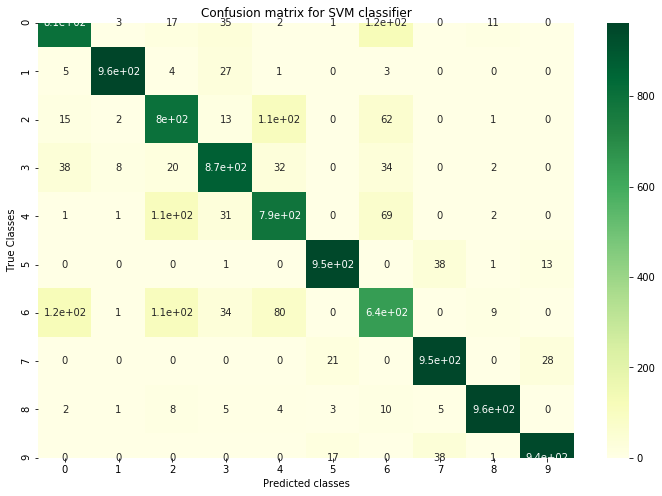

In [48]:
plt.figure(figsize=(12,8))
plt.title('Confusion matrix for SVM classifier')
sns.heatmap(confusion_matrix(y_test, y_hat_svc), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

### 3. SGD Classifier

**3.1. Training SGD Model**

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

time_start = time.time()

sgd_clf = SGDClassifier()

cv_scores=cross_val_score(sgd_clf,X_train, y_train,cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SGD mean accuracy:', round(cv_scores.mean()*100,3),'%, std',round(cv_scores.var()*100,3) )

Time elapsed: 27.73216414451599 seconds
SGD mean accuracy: 80.199 %, std 0.003


In [50]:
sgd_clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
print(cv_scores)

[0.80788423 0.80769231 0.80390195 0.7933967  0.79709419]


In [52]:
time_start = time.time()

sgd_clf.fit(X_train, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 7.311830043792725 seconds


**3.1. Predicting Test Dataset**

In [53]:
time_start = time.time()

y_hat_sgd= sgd_clf.predict(X_test)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

print('Test accuracy for SGD:',\
      round(accuracy_score(y_test, y_hat_sgd)*100,2),'%')

Time elapsed: 0.02698683738708496 seconds
Test accuracy for SGD: 80.09 %


**3.3. Trying Different Parameters**

In [54]:
sgd_clf = SGDClassifier(loss='hinge',penalty='l2',tol=1E-3)

cv_scores=cross_val_score(sgd_clf,X_train, y_train,cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SGD mean accuracy:', round(cv_scores.mean()*100,3),'%, std',round(cv_scores.var()*100,3) )

Time elapsed: 28.4516818523407 seconds
SGD mean accuracy: 80.8 %, std 0.005


In [55]:
sgd_clf = SGDClassifier(loss='hinge',penalty='l1',tol=1E-3)

cv_scores=cross_val_score(sgd_clf,X_train, y_train,cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SGD mean accuracy:', round(cv_scores.mean()*100,3),'%, std',round(cv_scores.var()*100,3) )

Time elapsed: 226.28382897377014 seconds
SGD mean accuracy: 80.361 %, std 0.007


In [56]:
sgd_clf = SGDClassifier(loss='log',penalty='l2',tol=1E-3)

cv_scores=cross_val_score(sgd_clf,X_train, y_train,cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SGD mean accuracy:', round(cv_scores.mean()*100,3),'%, std',round(cv_scores.var()*100,3) )

Time elapsed: 273.8865520954132 seconds
SGD mean accuracy: 80.37 %, std 0.004


In [57]:
sgd_clf = SGDClassifier(loss='perceptron',penalty='l2',tol=1E-3)

cv_scores=cross_val_score(sgd_clf,X_train, y_train,cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SGD mean accuracy:', round(cv_scores.mean()*100,3),'%, std',round(cv_scores.var()*100,3) )

Time elapsed: 304.2441415786743 seconds
SGD mean accuracy: 78.94 %, std 0.022


In [58]:
sgd_clf = SGDClassifier(loss='modified_huber',penalty='l2',tol=0.001)

cv_scores=cross_val_score(sgd_clf,X_train, y_train,cv=5)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('SGD mean accuracy:', round(cv_scores.mean()*100,3),'%, std',round(cv_scores.var()*100,3) )

Time elapsed: 342.23735213279724 seconds
SGD mean accuracy: 79.371 %, std 0.012


**3.4. Random Search**

In [59]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'loss':['hinge','log','perceptron','modified_huber'],
              'penalty':['l1','l2'],
              'tol':[0.001,0.01,0.1]}

time_start = time.time()

random_search = RandomizedSearchCV(estimator=sgd_clf, 
                           param_distributions=param_dist,
                           n_iter=50,                     
                           scoring='accuracy',
                           cv=5)

random_search.fit(X_train, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\User\Machine-Learning\Install\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Time elapsed: 2141.1119413375854 seconds


In [60]:
print(random_search.best_params_)
print("\n",random_search.best_estimator_)

{'tol': 0.1, 'penalty': 'l1', 'loss': 'hinge'}

 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.1,
              validation_fraction=0.1, verbose=0, warm_start=False)


**3.5. Training Model with Best Parameters**

In [61]:
sgd_clf=SGDClassifier(loss= random_search.best_params_['loss'],
                     penalty= random_search.best_params_['penalty'],
                    tol= random_search.best_params_['tol'])

time_start = time.time()

sgd_clf.fit(X_train,y_train)
y_hat_sgd = sgd_clf.predict(X_test)

print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('Test accuracy for SGDClassifier, using best parameters from random search:',
      round(accuracy_score(y_test, y_hat_sgd)*100, 2), '%')


Time elapsed: 5.167036533355713 seconds
Test accuracy for SGDClassifier, using best parameters from random search: 81.19 %
